In [3]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization

print("Loaded required libraries...")

ModuleNotFoundError: No module named 'keras.layers.normalization'

In [ ]:
# Download dataset from URL: https://www.kaggle.com/datasets/emmarex/plantdisease
fpath = "INSERT_LOCAL_FILE_PATH_HERE"
random_seed = 111

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['Tomato_Late_blight', 'Tomato_healthy', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Leaf_Mold', 'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot', 'Tomato_Early_blight', 'Potato___healthy', 'Pepper__bell___healthy', 'Potato___Early_blight', 'PlantVillage', 'Pepper__bell___Bacterial_spot', 'Potato___Late_blight'] 

No. of categories =  16


In [ ]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category)[:300]:
            file_ext = image_name.split(".")[-1]
            if (file_ext.lower() == "jpg") or (file_ext.lower() == "jpeg"):
                #print(f"\nCategory = {category}, Image name = {image_name}")
                img = cv2.imread(fpath+"/"+category+"/"+image_name)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img_array = Image.fromarray(img, 'RGB')
                resized_img = img_array.resize((227, 227))

                img_lst.append(np.array(resized_img))

                labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  4352 
No. of labels loaded =  4352
<class 'list'> <class 'list'>


In [ ]:
images = np.array(images)
labels = np.array(labels)
print("Images shape = ",images.shape)
print(type(images),type(labels))

Images shape =  (4352, 227, 227, 3) 
Labels shape =  (4352,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


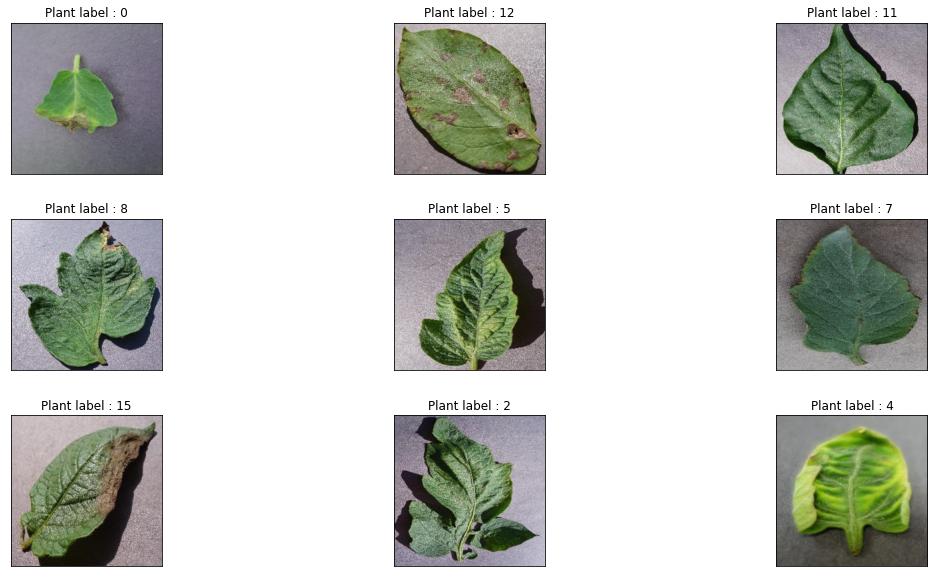

In [ ]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0
    for i in range(9):
        n += 1
        r = np.random.randint(0 , images.shape[0] , 1)

        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])

        plt.title('Plant label : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])

    plt.show()

display_rand_images(images, labels)

In [ ]:
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)
#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 4349 4350 4351]

'n' values after shuffling =  [3063 2450 3854 ... 4182 2004 3924]


In [ ]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (4352, 227, 227, 3) 
Labels shape after shuffling =  (4352,)


In [ ]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (4352, 227, 227, 3)


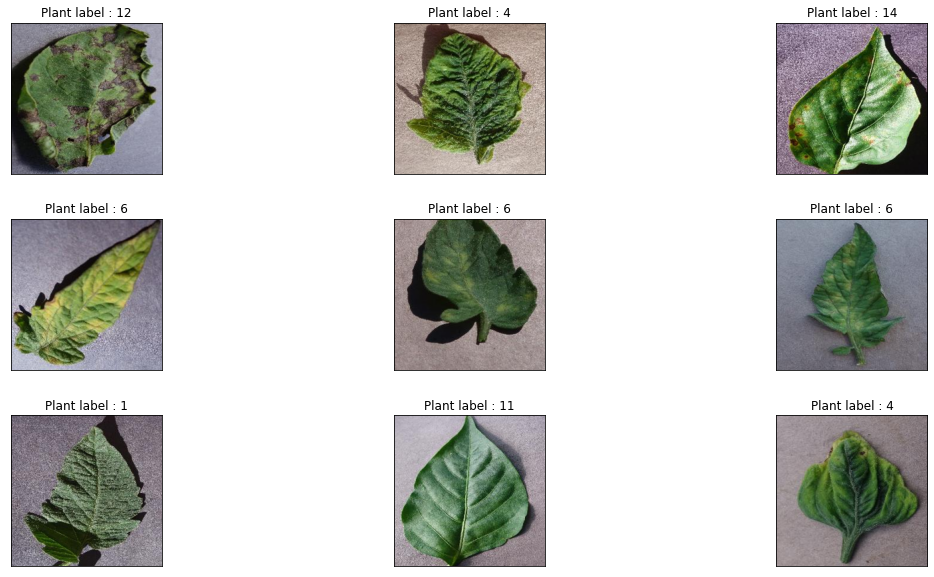

In [ ]:
#Random images after normalization
display_rand_images(images, labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (3481, 227, 227, 3)
y_train shape =  (3481,)

x_test shape =  (871, 227, 227, 3)
y_test shape =  (871,)


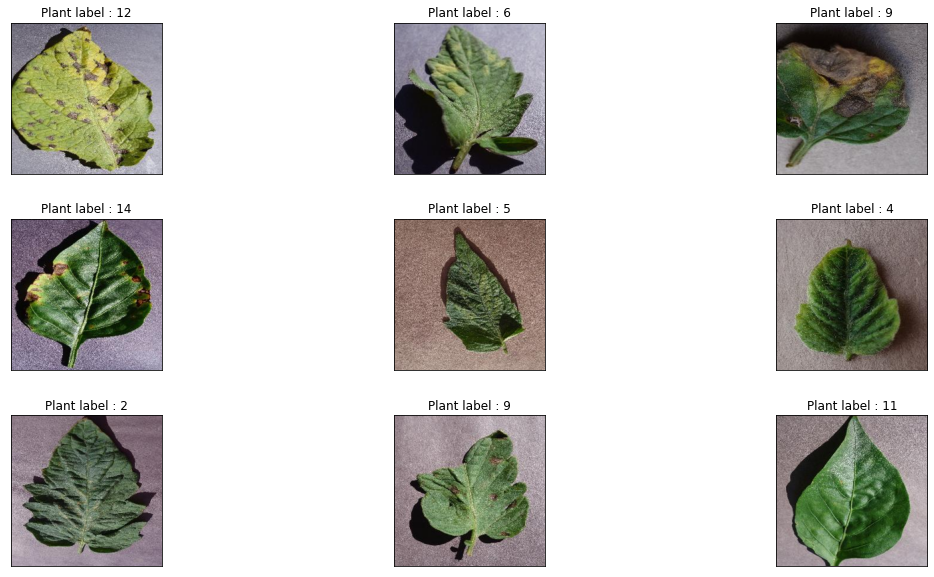

In [ ]:
display_rand_images(x_train, y_train)

In [ ]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 384)         8

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#model.compile(optimizer=keras.optimizers.Adam(),
                       #loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                       #metrics=['accuracy'])
#epochs=10

In [ ]:
r= model.fit(x_train, y_train, epochs=50,verbose=2, validation_data=(x_test,y_test))
#history= model.fit(x_train,y_train, steps_per_epoch=150, validation_data=(x_test,y_test), epochs=epochs, validation_steps=100)


Epoch 1/50
109/109 - 303s - loss: 2.1321 - accuracy: 0.3080 - val_loss: 2.9494 - val_accuracy: 0.1906
Epoch 2/50
109/109 - 302s - loss: 1.9863 - accuracy: 0.3465 - val_loss: 3.8628 - val_accuracy: 0.1274
Epoch 3/50
109/109 - 301s - loss: 1.8185 - accuracy: 0.3976 - val_loss: 5.2163 - val_accuracy: 0.0918
Epoch 4/50
109/109 - 302s - loss: 1.6614 - accuracy: 0.4421 - val_loss: 4.1641 - val_accuracy: 0.1022
Epoch 5/50
109/109 - 301s - loss: 1.5008 - accuracy: 0.4932 - val_loss: 4.2732 - val_accuracy: 0.1102
Epoch 6/50
109/109 - 303s - loss: 1.3535 - accuracy: 0.5401 - val_loss: 2.3491 - val_accuracy: 0.3031
Epoch 7/50
109/109 - 304s - loss: 1.2318 - accuracy: 0.5763 - val_loss: 2.3066 - val_accuracy: 0.3088
Epoch 8/50
109/109 - 303s - loss: 1.0948 - accuracy: 0.6265 - val_loss: 1.5821 - val_accuracy: 0.5052
Epoch 9/50
109/109 - 304s - loss: 0.9398 - accuracy: 0.6760 - val_loss: 2.8141 - val_accuracy: 0.3169
Epoch 10/50
109/109 - 303s - loss: 0.8472 - accuracy: 0.7156 - val_loss: 1.5605 - 

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(loss,accuracy)

28/28 [==============================] - 19s 665ms/step - loss: 2.2112 - accuracy: 0.6108
2.2112274169921875 0.6107922196388245


In [ ]:
print(r.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


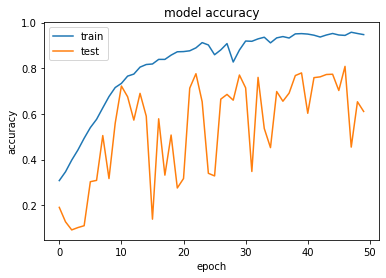

In [ ]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

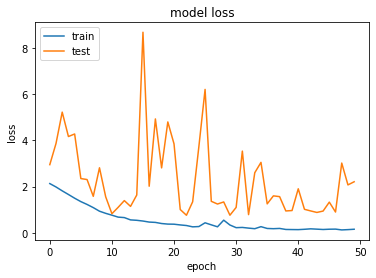

In [ ]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(x_test)

pred.shape

(871, 20)

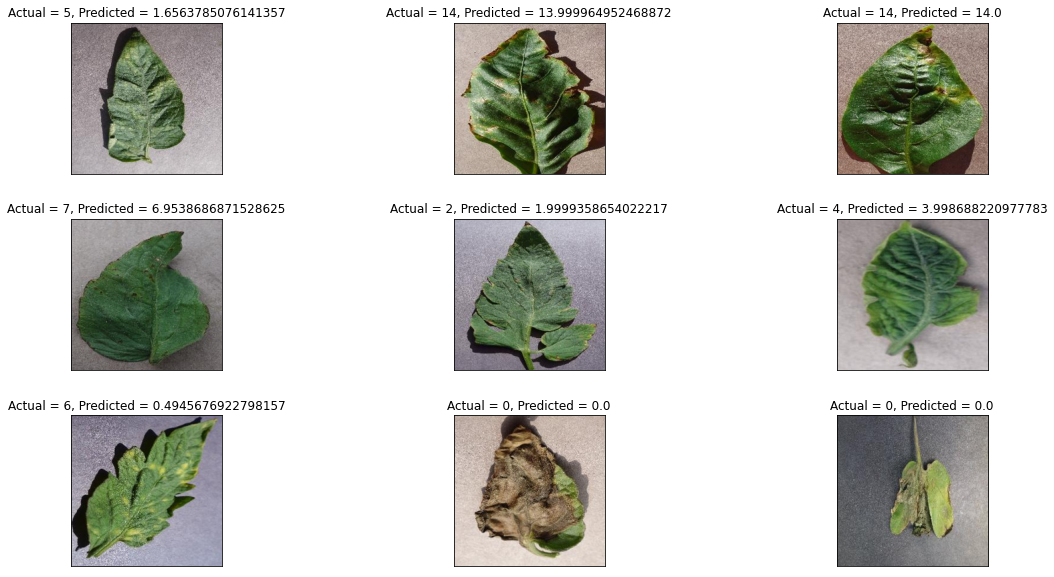

In [ ]:
plt.figure(1 , figsize = (19 , 10))
n = 0

for i in range(9):
    n += 1
    r = np.random.randint( 0, x_test.shape[0], 1)

    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

In [ ]:
#acc = history.history['acc']
#val_acc = history.history['val_acc']
#loss = history.history['loss']
#val_loss = history.history['val_loss']
#epochs = range(1, len(acc) + 1)
#Train and validation accuracy
#plt.plot(epochs, acc, 'b', label='Training accurarcy')
#plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
#plt.title('Training and Validation accurarcy')
#plt.legend()

#plt.figure()
#Train and validation loss
#plt.plot(epochs, loss, 'b', label='Training loss')
#plt.plot(epochs, val_loss, 'r', label='Validation loss')
#plt.title('Training and Validation loss')
#plt.legend()
#plt.show()